# Building a classification model for Cardiac Arrest Prediction 

In [1]:
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('../input/cardio-train/cardio_train.csv')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
data=data.drop_duplicates()
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
data=data.drop(['id','active'],axis=1)

In [5]:
data.age=round(data.age/365)

In [6]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1
2,52.0,1,165,64.0,130,70,3,1,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,53.0,2,168,76.0,120,80,1,1,1,0,0
69996,62.0,1,158,126.0,140,90,2,2,0,0,1
69997,52.0,2,183,105.0,180,90,3,1,0,1,1
69998,61.0,1,163,72.0,135,80,1,2,0,0,1


In [7]:
# here we can get one more feature i.e BMI
# to calculate BMI we need height in meter squared but given is cm.

In [8]:
data['BMI']=data['weight']/((data.height/100)**2)
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio,BMI
0,50.0,2,168,62.0,110,80,1,1,0,0,0,21.967120
1,55.0,1,156,85.0,140,90,3,1,0,0,1,34.927679
2,52.0,1,165,64.0,130,70,3,1,0,0,1,23.507805
3,48.0,2,169,82.0,150,100,1,1,0,0,1,28.710479
4,48.0,1,156,56.0,100,60,1,1,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53.0,2,168,76.0,120,80,1,1,1,0,0,26.927438
69996,62.0,1,158,126.0,140,90,2,2,0,0,1,50.472681
69997,52.0,2,183,105.0,180,90,3,1,0,1,1,31.353579
69998,61.0,1,163,72.0,135,80,1,2,0,0,1,27.099251


<AxesSubplot:>

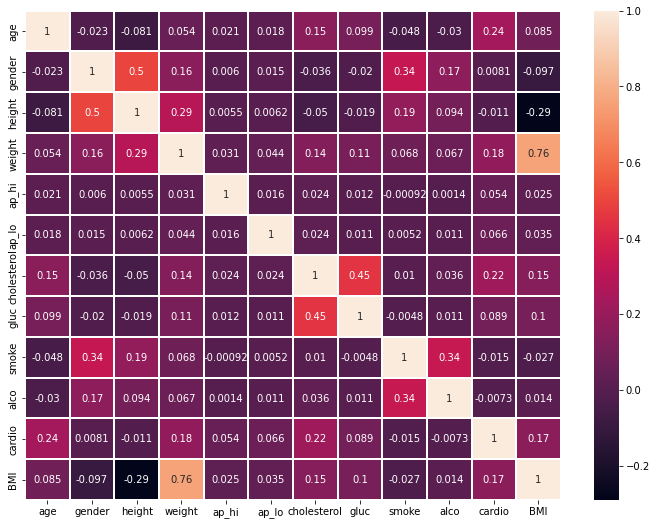

In [9]:
cm=data.corr()
plt.figure(figsize=(12,9))
sns.heatmap(cm,annot=True,linewidths=2)

In [10]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.499700,27.556513
std,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.500003,6.091511
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.471784
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000,23.875115
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000,26.374068
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,30.222222
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,298.666667


In [11]:
# there are some unrealastic values from ap_lo and ap_hi
# neglecting those values

In [12]:
data=data[data['ap_lo']>0]
data=data[data['ap_hi']<250]
data=data[data['ap_hi']>60]
data=data[data['ap_lo']<150]
data=data[data['ap_lo']>50]

## Univariate analyasis

<AxesSubplot:xlabel='cardio', ylabel='count'>

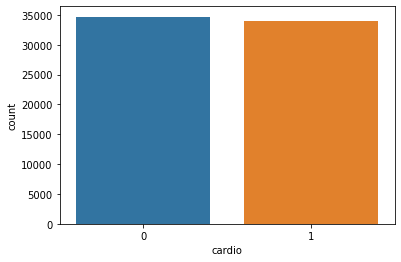

In [13]:
sns.countplot(data.cardio)

<AxesSubplot:xlabel='cholesterol', ylabel='count'>

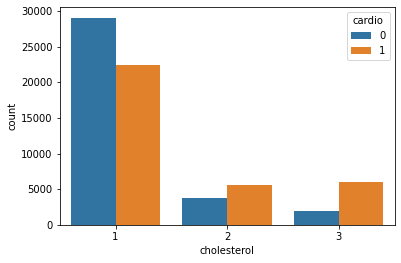

In [14]:
sns.countplot(data.cholesterol,hue=data.cardio)

<AxesSubplot:xlabel='smoke', ylabel='count'>

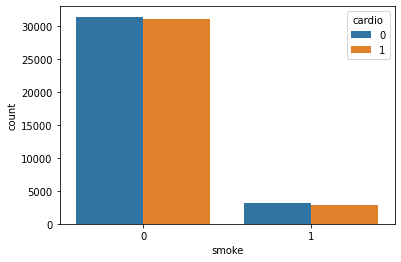

In [15]:
sns.countplot(data.smoke,hue=data.cardio)

<AxesSubplot:xlabel='alco', ylabel='count'>

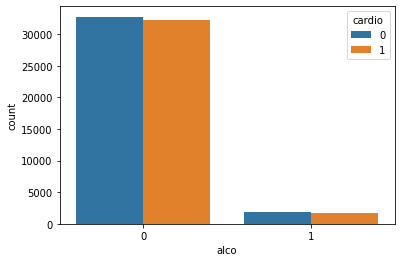

In [16]:
sns.countplot(data.alco,hue=data.cardio)

<AxesSubplot:xlabel='cholesterol', ylabel='count'>

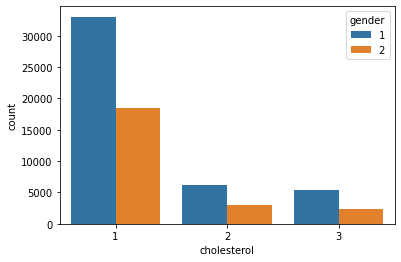

In [17]:
sns.countplot(data.cholesterol,hue=data.gender)

<AxesSubplot:xlabel='cholesterol', ylabel='cardio'>

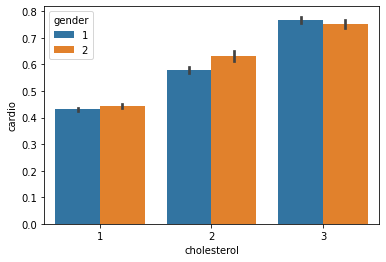

In [18]:
sns.barplot(data.cholesterol,data.cardio,hue=data.gender)

<AxesSubplot:xlabel='BMI', ylabel='count'>

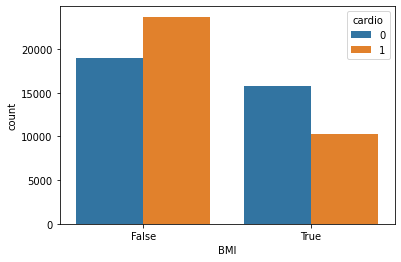

In [19]:
sns.countplot(data.BMI<25,hue=data.cardio)

<AxesSubplot:xlabel='ap_hi', ylabel='ap_lo'>

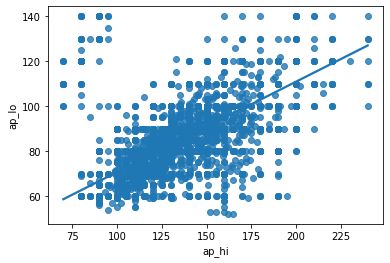

In [20]:
sns.regplot(data.ap_hi,data.ap_lo)

<AxesSubplot:xlabel='ap_hi', ylabel='age'>

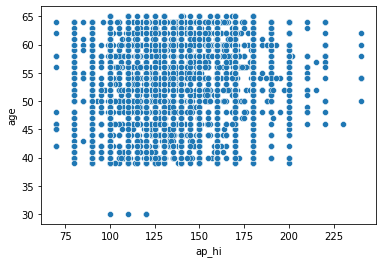

In [21]:
sns.scatterplot(data.ap_hi,data.age)

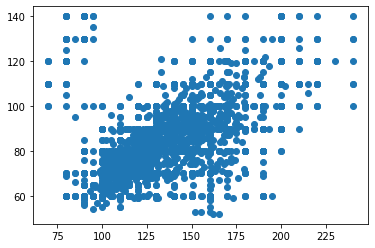

In [22]:
plt.scatter(data.ap_hi,data.ap_lo)

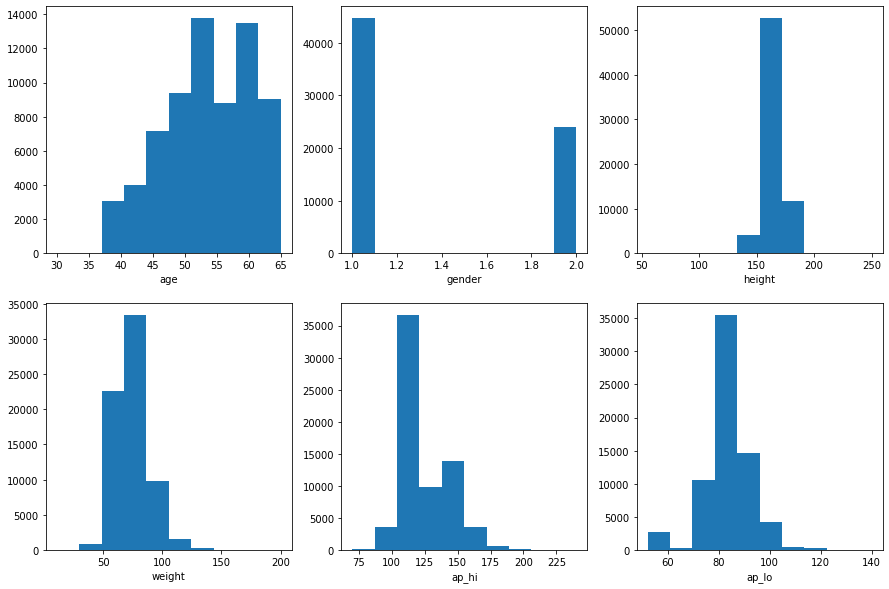

In [23]:
col=data.columns
plt.figure(figsize=(15,10))
for i in range(len(col)-6):
    plt.subplot(2,3,i+1)
    plt.hist(data[col[i]])
    plt.xlabel(col[i])
    

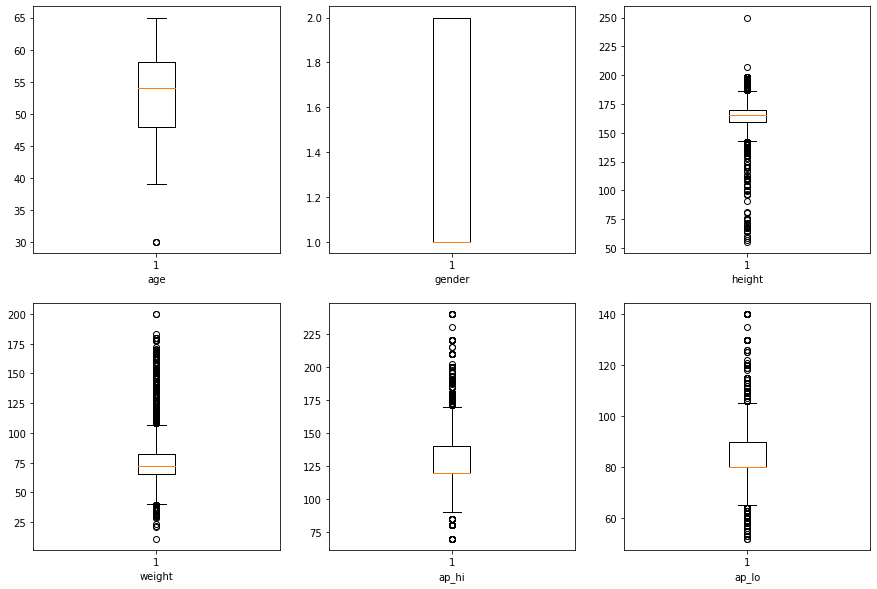

In [24]:
col=data.columns
plt.figure(figsize=(15,10))
for i in range(len(col)-6):
    plt.subplot(2,3,i+1)
    plt.boxplot(data[col[i]])
    plt.xlabel(col[i])

## Result of Univariate Analysis
* By observing the histogram and box plot there are more no of outliers are present in Height, Weight, ap_hi, ap_lo.
* To deal with this here i am using 2nd and 3rd standard deviation

In [25]:
upper_limit= data.weight.mean() + 2*data.weight.std()
print(upper_limit)
lower_limit= data.weight.mean() - 2*data.weight.std()
lower_limit

102.78225468596331


45.47930259440248

In [26]:
data=data[data['weight']<upper_limit] 

In [27]:
data=data[data['weight']>lower_limit]

In [28]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio,BMI
count,65550.000000,65550.000000,65550.000000,65550.000000,65550.000000,65550.000000,65550.000000,65550.000000,65550.000000,65550.000000,65550.000000,65550.000000
mean,53.329397,1.346285,164.272906,72.705122,126.259908,81.206911,1.354249,1.218566,0.086743,0.052220,0.488299,27.039223
std,6.762154,0.475789,8.023614,11.684446,16.429007,9.357428,0.671184,0.564659,0.281460,0.222471,0.499867,5.047929
min,30.000000,1.000000,55.000000,46.000000,70.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,13.760000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000,23.833005
50%,54.000000,1.000000,165.000000,71.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000,26.142688
75%,58.000000,2.000000,170.000000,80.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,29.687500
max,65.000000,2.000000,250.000000,102.000000,240.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,267.768595


In [29]:
upper_limit= data.height.mean() + 2*data.height.std()
print('upper limit: ',upper_limit)
lower_limit= data.height.mean() - 2*data.height.std()
print('Lower limit: ',lower_limit)

data=data[data['height']<upper_limit]
data=data[data['height']>lower_limit]


upper limit:  180.32013502364015
Lower limit:  148.22567733333926


In [30]:
upper_limit= data.ap_hi.mean() + 3*data.ap_hi.std()
print('upper limit: ',upper_limit)
lower_limit= data.ap_hi.mean() - 3*data.ap_hi.std()
print('Lower limit: ',lower_limit)

data=data[data['ap_hi']<upper_limit]
data=data[data['ap_hi']>lower_limit]


upper limit:  175.38118514996137
Lower limit:  77.03762946609105


In [31]:
upper_limit= data.ap_lo.mean() + 3*data.ap_lo.std()
print('upper limit: ',upper_limit)
lower_limit= data.ap_lo.mean() - 3*data.ap_lo.std()
print('Lower limit: ',lower_limit)

data=data[data['ap_lo']<150]
data=data[data['ap_lo']>50]

upper limit:  108.0428134621664
Lower limit:  53.85359948062596


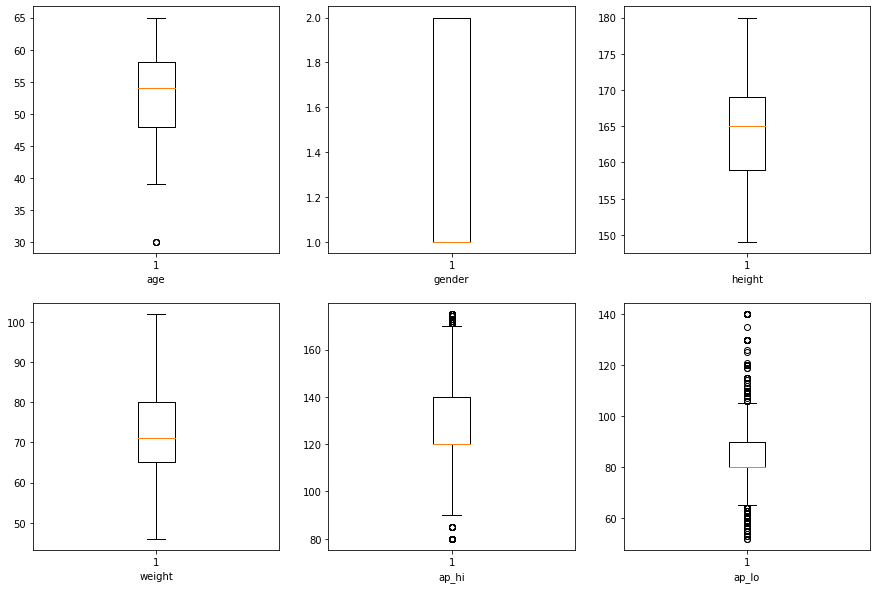

In [32]:
col=data.columns
plt.figure(figsize=(15,10))
for i in range(len(col)-6):
    plt.subplot(2,3,i+1)
    plt.boxplot(data[col[i]])
    plt.xlabel(col[i])

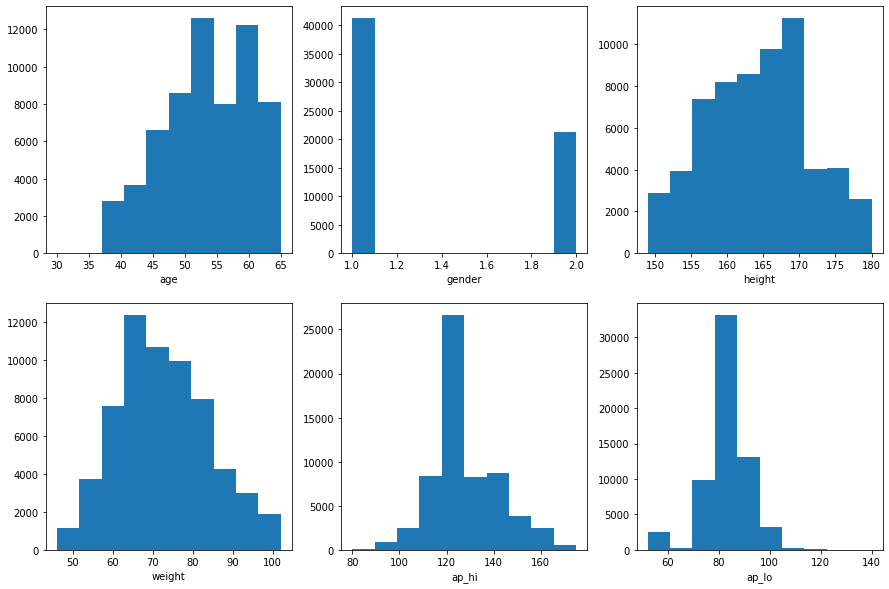

In [33]:
col=data.columns
plt.figure(figsize=(15,10))
for i in range(len(col)-6):
    plt.subplot(2,3,i+1)
    plt.hist(data[col[i]])
    plt.xlabel(col[i])

In [34]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio,BMI
count,62614.000000,62614.000000,62614.000000,62614.000000,62614.000000,62614.000000,62614.000000,62614.000000,62614.000000,62614.000000,62614.000000,62614.000000
mean,53.287747,1.340467,164.282333,72.544897,125.528332,80.948206,1.349858,1.217603,0.085013,0.051282,0.483167,26.925633
std,6.760275,0.473870,6.940064,11.540075,15.112495,9.031536,0.668079,0.564074,0.278903,0.220575,0.499721,4.347394
min,30.000000,1.000000,149.000000,46.000000,80.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,15.369708
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000,23.808690
50%,54.000000,1.000000,165.000000,71.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000,26.106562
75%,58.000000,2.000000,169.000000,80.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,29.585799
max,65.000000,2.000000,180.000000,102.000000,175.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,45.943876


# Building the model

In [35]:
y=data.cardio

In [36]:
x=data[['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco']]

In [37]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco
0,50.0,2,168,62.0,110,80,1,1,0,0
1,55.0,1,156,85.0,140,90,3,1,0,0
2,52.0,1,165,64.0,130,70,3,1,0,0
3,48.0,2,169,82.0,150,100,1,1,0,0
4,48.0,1,156,56.0,100,60,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
69993,54.0,1,172,70.0,130,90,1,1,0,0
69994,58.0,1,165,80.0,150,80,1,1,0,0
69995,53.0,2,168,76.0,120,80,1,1,1,0
69998,61.0,1,163,72.0,135,80,1,2,0,0


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=True)

### Logistic Regression

In [40]:
lgr=LogisticRegression(solver='newton-cg').fit(x_train,y_train)
print('Accuracy of Logistic Regression:',accuracy_score(y_test,lgr.predict(x_test)))

Accuracy of Logistic Regression: 0.7271935343367372


In [41]:
print('Classification Report:\n',classification_report(y_test,lgr.predict(x_test)))

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.80      0.75     10788
           1       0.75      0.65      0.69      9875

    accuracy                           0.73     20663
   macro avg       0.73      0.72      0.72     20663
weighted avg       0.73      0.73      0.73     20663



### Gradient Boosting Classifier

In [42]:
model=GradientBoostingClassifier().fit(x_train,y_train)

In [43]:
pred=model.predict(x_test)

In [44]:
print('Accuracy of GradientBoostingClassifier:',accuracy_score(y_test,pred))

Accuracy of GradientBoostingClassifier: 0.7316459371824033


In [45]:
print('Classification Report:\n',classification_report(y_test,pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.79      0.75     10788
           1       0.74      0.67      0.70      9875

    accuracy                           0.73     20663
   macro avg       0.73      0.73      0.73     20663
weighted avg       0.73      0.73      0.73     20663



### Random Forest Classifier

In [46]:
rfc = RandomForestClassifier(random_state=True)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=True)

In [47]:
print('Accuracy of random forrest classifier:',accuracy_score(y_test,rfc.predict(x_test)))

Accuracy of random forrest classifier: 0.6969946280791753


In [48]:
print('Classification Report:\n',classification_report(y_test,rfc.predict(x_test)))

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.71     10788
           1       0.69      0.67      0.68      9875

    accuracy                           0.70     20663
   macro avg       0.70      0.70      0.70     20663
weighted avg       0.70      0.70      0.70     20663



## Evalution of above models

In [49]:
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve

### Based on confusion matrix

Confusion matrix of Logistic Regresssion model:


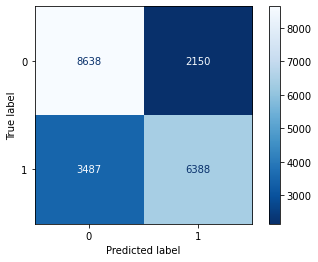

In [50]:
print('Confusion matrix of Logistic Regresssion model:')
lgr_cf=plot_confusion_matrix(lgr,x_test,y_test,cmap='Blues_r')

Confusion matrix of Random Forest Classifier model:


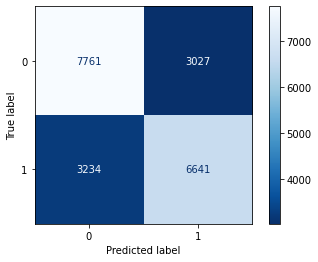

In [51]:
print('Confusion matrix of Random Forest Classifier model:')
lgr_cf=plot_confusion_matrix(rfc,x_test,y_test,cmap='Blues_r')

Confusion matrix of Gradient Boosting classifier model:


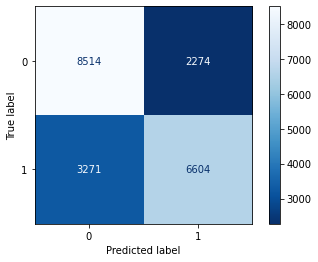

In [52]:
print('Confusion matrix of Gradient Boosting classifier model:')
lgr_cf=plot_confusion_matrix(model,x_test,y_test,cmap='Blues_r')

### ROC and Precision curve

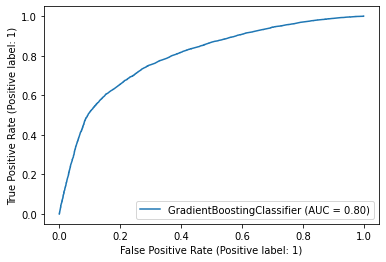

In [53]:
gbc_disp=plot_roc_curve(model,x_test,y_test)

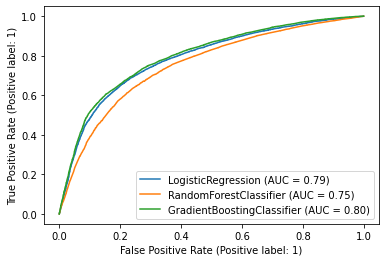

In [54]:
lgr_disp=plot_roc_curve(lgr,x_test,y_test)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, x_test, y_test, ax=ax)
gbc_disp.plot(ax=ax)
plt.show()

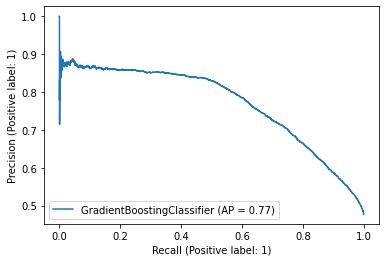

In [55]:
gbc_prc=plot_precision_recall_curve(model,x_test,y_test)

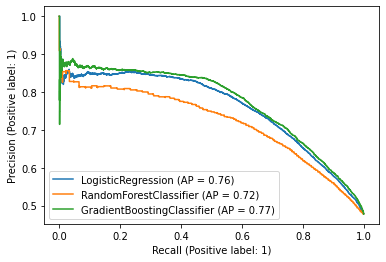

In [56]:
lgr_prc=plot_precision_recall_curve(lgr,x_test,y_test)
ax = plt.gca()
rfc_prc = plot_precision_recall_curve(rfc, x_test, y_test, ax=ax)
gbc_prc.plot(ax=ax)
plt.show()

# Result of evalution
* Considering all the obervation and metrics result, logistic regression and Gradient Boosting are performing similar.
* But based on ROC and Precision curve Gradient Boosting is at top of all the three models.
* Hence here choosing Gradient boosting as final model. 

In [57]:
pickle.dump(model,open('Healtcare.pkl','wb'))

In [58]:
pic=pickle.load(open('Healtcare.pkl','rb'))

In [59]:
pic.predict([[52.0,1,165,64.0,130,70,3,1,0,0]])

array([1])

In [60]:
import sklearn

In [61]:
print('sklearn: {}'.format(sklearn.__version__))

sklearn: 1.0.2
